In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

## **MNIST Dataset**

HandWritten Digits Images to train our Model

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


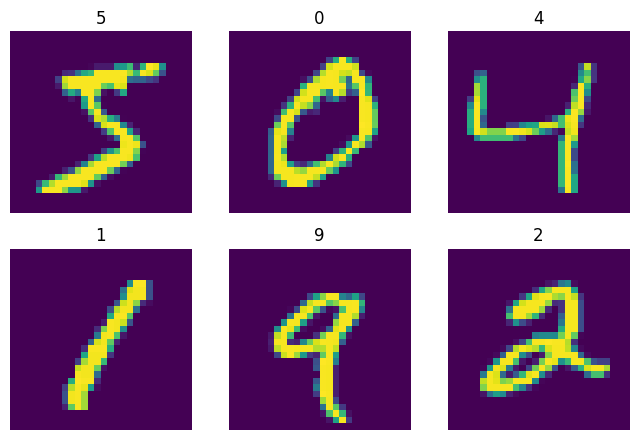

In [5]:
plt.figure(figsize = (8,8))

for i in range(6):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis("off")

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis =0)

x_test = tf.keras.utils.normalize(x_test, axis =0)

## **Model Building**

In [7]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape = (28,28)))

model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer= 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics =['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs = 15)

In [13]:
import cv2

In [14]:
image = cv2.imread('5.png')[:,:,0]
image = np.invert(np.array([image]))

1/1 [==============================] - 0s 107ms/step
3


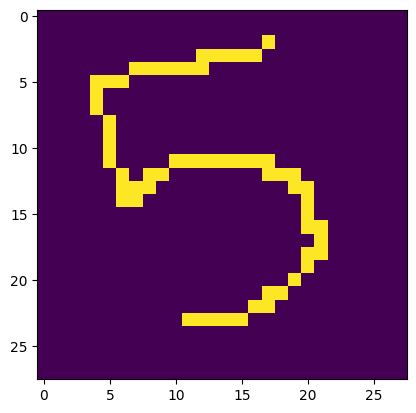

In [15]:
output = model.predict(image)

plt.imshow(image[0])
print(np.argmax(output))

In [16]:
model.save('HDR_Model.keras')

In [17]:
# Assuming 'model' is your trained neural network model
# and x_test, y_test are your test data and labels

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
# print("Hi Rahul")


313/313 [==============================] - 1s 2ms/step - loss: 0.3620 - accuracy: 0.9527
Test Accuracy: 95.27%


## **Deploying Model as a Web App using StreamLit**

---



In [ ]:
!pip install streamlit

# we have to install them for each session

In [ ]:
!npm install localtunnel

In [23]:
!streamlit run /content/app.py &> /content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 3.203s
your url is: https://cuddly-spies-speak.loca.lt
